## data cleaning

In [2]:
import pandas as pd
data = pd.read_csv("bilibili_videos.csv")

In [3]:
print(data.head())

  视频期数                           视频标题  \
0  第1期           这集vlog我们拍了十年，致最美好的青春   
1  第1期  华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少   
2  第1期                     【性转版】回家的诱惑   
3  第1期    哆啦A梦结局背后的秘密？从未播出的黑历史？真相出人意料   
4  第1期           在中国挑战通宵卖烧烤！为啥美国没有这个？   

                                                视频简介  \
0  我在18岁认识了你，\n然后我们开始了长达8年的异地恋，\n2019年03月16日\n我们在...   
1                      华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少   
2                性转版回家的诱惑\n都市男人拯救幸福情仇大戏\n认真你就输了23333   
3  微博：@瓶子君152\n关注关注关注关注关注关注关注关注关注关注关注关注\n三连三连三连三连...   
4  在美国我们很少有深夜美食，但是在中国却很多，那么，通宵卖烧烤是怎样的一种生活呢？\n\n关注...   

                          视频链接          视频ID  视频分类          up主  \
0  https://b23.tv/BV14b411J7ML  BV14b411J7ML    出行  AresserA木恩木   
1  https://b23.tv/BV15b41147uu  BV15b41147uu    三农         华农兄弟   
2  https://b23.tv/BV1xb411n7L6  BV1xb411n7L6  影视剪辑    兰彻lancche   
3  https://b23.tv/BV1Qb41177Vm  BV1Qb41177Vm  动漫杂谈       瓶子君152   
4  https://b23.tv/BV1Rb411E7yi  BV1Rb411E7yi  美食侦探        我是郭杰瑞   

             

In [5]:
data.drop_duplicates(inplace=True) ##删除重复行

In [6]:
data.isnull().sum()

视频期数         0
视频标题         0
视频简介       836
视频链接         0
视频ID         0
视频分类         0
up主          0
up主头像链接      0
播放量          0
弹幕数          0
评论数          0
收藏数          0
投币数          0
分享数          0
点赞量          0
踩的数量         0
热评/推荐信息     43
图片链接         0
发布时间         0
视频时长         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10268 entries, 0 to 10267
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   视频期数     10268 non-null  object
 1   视频标题     10268 non-null  object
 2   视频简介     9432 non-null   object
 3   视频链接     10268 non-null  object
 4   视频ID     10268 non-null  object
 5   视频分类     10268 non-null  object
 6   up主      10268 non-null  object
 7   up主头像链接  10268 non-null  object
 8   播放量      10268 non-null  int64 
 9   弹幕数      10268 non-null  int64 
 10  评论数      10268 non-null  int64 
 11  收藏数      10268 non-null  int64 
 12  投币数      10268 non-null  int64 
 13  分享数      10268 non-null  int64 
 14  点赞量      10268 non-null  int64 
 15  踩的数量     10268 non-null  int64 
 16  热评/推荐信息  10225 non-null  object
 17  图片链接     10268 non-null  object
 18  发布时间     10268 non-null  int64 
 19  视频时长     10268 non-null  int64 
dtypes: int64(10), object(10)
memory usage: 1.6+ MB


In [8]:
data['点赞率'] = data['点赞量']/data['播放量']
data['收藏率'] = data['收藏数']/data['播放量']
data['分享率'] = data['分享数']/data['播放量']
data['投币率'] = data['投币数']/data['播放量']

#### 点赞+收藏+分享

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

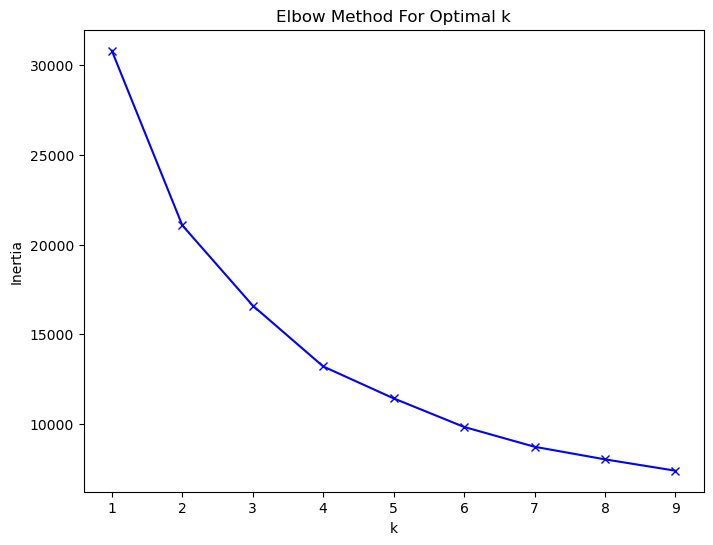

In [10]:
# 使用K-means聚类分析UP主类型
import matplotlib.pyplot as plt
# 准备数据
X = data[['点赞率', '收藏率', '分享率']].values

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用肘部法则确定最佳聚类数
inertias = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8,6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


#### 选k

In [12]:
# 执行K-means聚类
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 分析每个聚类的特征
cluster_means = data.groupby('Cluster')[['点赞率', '收藏率', '分享率']].mean()
print("\n各聚类中心点特征:")
print(cluster_means)


print("\n聚类分析结果描述:")

for i in range(k):
    print(f"\n聚类 {i}的up数量:", len(data[data['Cluster'] == i]))


各聚类中心点特征:
              点赞率       收藏率       分享率
Cluster                              
0        0.055659  0.011832  0.003538
1        0.112741  0.020151  0.004615
2        0.072260  0.023805  0.018175
3        0.100472  0.068402  0.009907

聚类分析结果描述:

聚类 0的up数量: 5718

聚类 1的up数量: 2609

聚类 2的up数量: 1294

聚类 3的up数量: 647


0-点赞高，***收藏特别高***，分享很好：干货/精华视频  
1-点赞一般，收藏一般，***分享率特别高***：可以引起情绪共鸣的视频（生活类，抽象？）  
2-都低（分布均衡）：有粉丝基础，非一次爆火型  
3-***点赞率高***，收藏率一般，分享率低：搞笑视频

### 聚类结果可视化

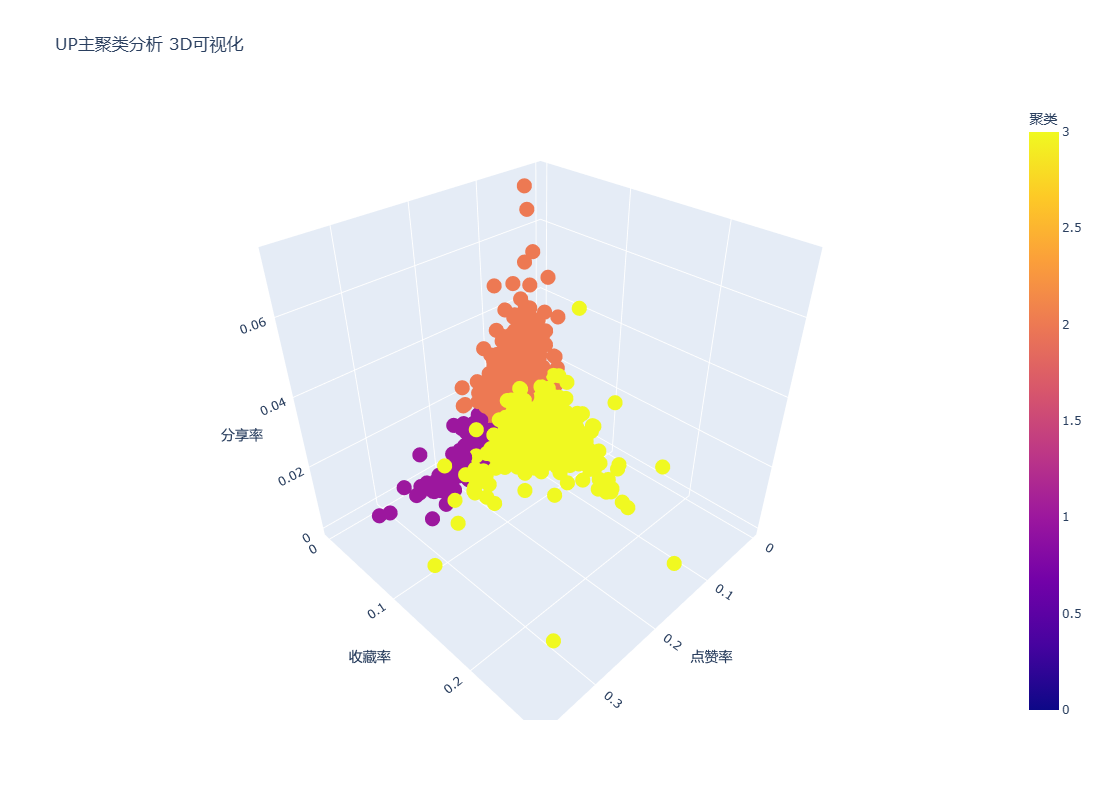

In [13]:
import plotly.express as px
import plotly.graph_objects as go

# 创建3D散点图
fig = px.scatter_3d(
    data, 
    x='点赞率', 
    y='收藏率', 
    z='分享率',
    color='Cluster',
    labels={
        '点赞率': '点赞率',
        '收藏率': '收藏率',
        '分享率': '分享率',
        'Cluster': '聚类'
    },
    title='UP主聚类分析 3D可视化'
)

# 更新布局
fig.update_layout(
    scene = dict(
        xaxis_title='点赞率',
        yaxis_title='收藏率',
        zaxis_title='分享率'
    ),
    width=800,
    height=800,
    showlegend=True
)

# 显示图表
fig.show()



#### 静态图

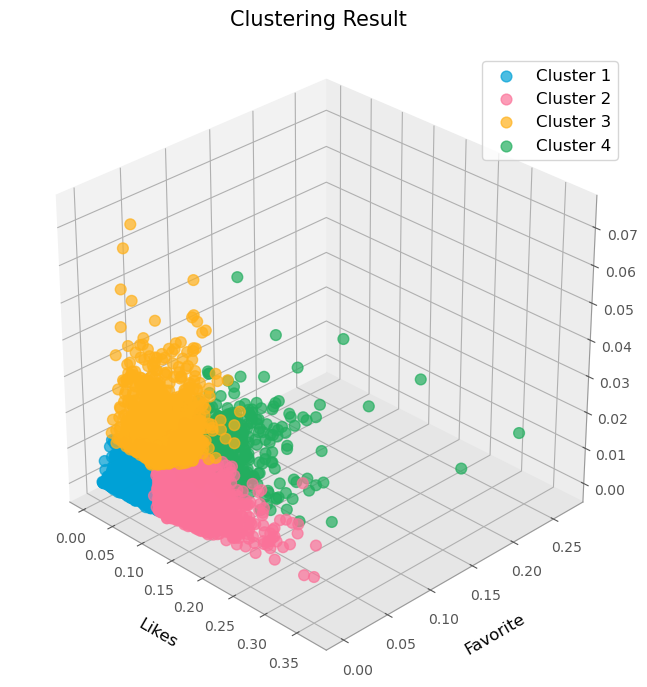

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# B站主题色
bilibili_colors = ['#00A1D6', '#FB7299', '#FFB11B', '#23AE5F'] 

# 创建3D图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 设置背景色为浅灰色
ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('#FFFFFF')

# 为每个聚类绘制散点
for i in range(4):
    cluster_data = data[data['Cluster'] == i]
    ax.scatter(
        cluster_data['点赞率'],
        cluster_data['收藏率'], 
        cluster_data['分享率'],
        c=bilibili_colors[i],
        label=f'Cluster {i+1}',
        alpha=0.7,  
        s=60  
    )

# 设置坐标轴标签和字体大小
ax.set_xlabel('Likes', fontsize=12, labelpad=10)
ax.set_ylabel('Favorite', fontsize=12, labelpad=10)
ax.set_zlabel('Share', fontsize=12, labelpad=10)

# 设置刻度字体大小和颜色
ax.tick_params(axis='both', labelsize=10, colors='#555555')

# 设置坐标轴颜色
ax.xaxis.line.set_color('#999999')
ax.yaxis.line.set_color('#999999')
ax.zaxis.line.set_color('#999999')

# 设置坐标轴面板颜色
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.93, 0.93, 0.93, 1.0))
ax.zaxis.set_pane_color((0.90, 0.90, 0.90, 1.0))

# 添加标题和图例
plt.title('Clustering Result', pad=20, fontsize=15)
plt.legend(loc='upper right', fontsize=12)

# 调整视角以更好地展示所有点
ax.view_init(elev=30, azim=315)

# 调整坐标轴范围,确保所有点都在视野内
ax.set_box_aspect([1,1,0.95])  


# 添加网格线并美化
ax.grid(True, linestyle='--', alpha=0.3, color='#cccccc')

# 调整图形位置
plt.subplots_adjust(left=0, right=0.85)

plt.show()